### Reading and processing and audio segment from a microphone

This notebook gives a simple example to read and process a short audio sequence from a microphone. You may want to adopt this strategy in your camera to help detect wildlife.

You will need to install a few python packages for this

* numpy
* matplotlib
* pyaudio

On ubuntu it seems best to install pyaudio using apt, sudo apt install python3-pyaudio

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import pyaudio #reads from microphone
import wave #saves audio file for testing

In [7]:
chunk_size = 1024 # fixed chunk size
recording_time = 5 # record for 5 seconds
rate = 44100 # Sampling rate

# file to save audio for sanity checking

wf = wave.open('./test.wav', 'wb') # We will save the audio we record from our mic to a wav file to test.
wf.setnchannels(1)
wf.setsampwidth(2)
wf.setframerate(rate)

# Initialise 
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=rate, input=True, frames_per_buffer=chunk_size)

audio = []
for i in range(0,rate//(chunk_size)*recording_time):
    
    data = stream.read(chunk_size)
    wf.writeframesraw(data)
    audio.append(np.frombuffer(data, dtype=np.int16))

audio = np.hstack(audio)

#Close stream 
stream.stop_stream()
stream.close()
p.terminate()

#Close recording file
wf.close()

ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
Jac

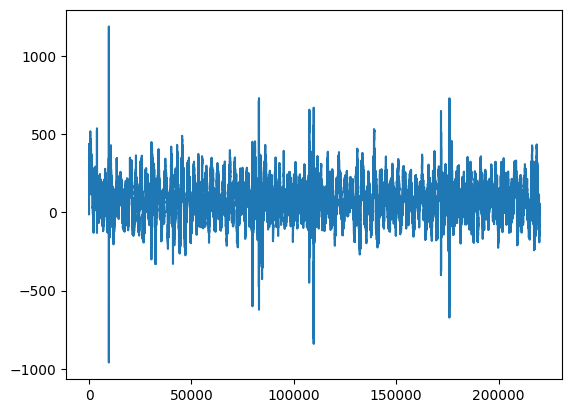

In [8]:
# Let's look at the audio we recorded - its a single channel 
plt.plot(audio)
plt.show()

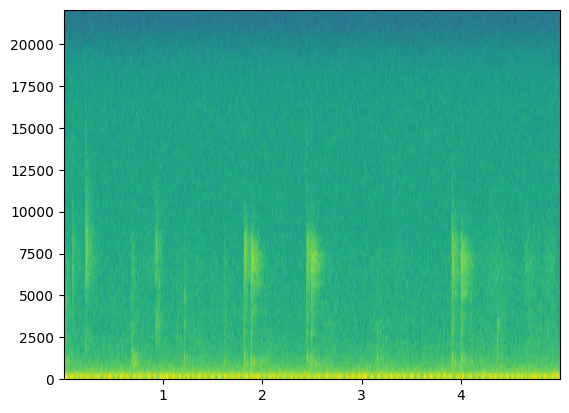

In [9]:
# Let's plot a spectrogram of our audio
plt.specgram(audio,Fs=rate)
plt.show()

Great - we can read audio from our mic now, and analyse it with a spectrogram. It's now in a form we could use for classification or thresholding, depending on your designs.